In [389]:
import os
from glob import glob
from pprint import pprint
import numpy as np
cwd = os.getcwd()
print(cwd)
py_files = glob('*.py')
print(py_files)

/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports
['config.py', 'global_config.py', 'equations.py']


In [390]:
from equations import *

In [391]:
import sys
sys.path.append("/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports")
### Import fields functions

from config import *
### Packages for some plotting to view outputs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import xarray as xr
import scipy as sp
import rasterio
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

In [392]:
config['prep_base_chunk'] = 500

print(config)

{'prep_file_dir': '/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports/outputs', 'prep_tile_id': 'TPT', 'prep_base_chunk': 500, 'prep_time_chunk': 'auto', 'prep_remove_overlap': False, 'prep_manual_subset': True, 'prep_x_start': 7500, 'prep_y_start': 7500, 'prep_step': 500, 'prep_cloud_coverage_thresh': 50, 'prep_load_cloud_mask': True, 'prep_apply_cloud_mask': True, 'prep_cloud_mask_thresh': 70, 'prep_clip_outliers': True, 'prep_clip_percentile': 1, 'prep_normalize_bands': True, 'preproc_out_dir': 'preproc_out_dir/', 'preproc_outfile_prefix': 'fields_preproc_demo_', 'preproc_sample_pct': 0.05, 'preproc_n_clusters': 15, 'preproc_cluster_tile': True, 'kmeans_n_clusters': 15, 'kmeans_model_out_dir': 'kmeans_model_dir/', 'kmeans_8var_clusters': True, 'kmeans_std_thresh': 0.2, 'kmeans_min_thresh': 0, 'kmeans_max_thresh': 0.3, 'kmeans_range_thresh': 0.7, 'kmeans_ndwi_thresh': 0.2, 'kmeans_mask_out_dir': 'mask_out_dir/', 'kmeans_from_full_tile_mask': False, 'seg_rgb_date_str':

In [393]:


### Loading sample data directly from netCDF file

# filepath to the sample data
# sample_data_fp = 'C:/Users/jesse/Documents/grad school/masters research/code/fields_library/thesis_code_cleanup/sample_data/sample_data_TPT_px500_cldcov40_cldmask.nc'
sample_data_fp = 'output2.nc'


### In order to utilize parallel processing with dask within xarray, make sure to set a chunk size when reading in the data.
### You can use the keywork 'auto' to have dask automatically set a chunk size based on data size and memory limitations
ds_time_stack = xr.open_dataset(sample_data_fp, chunks={'x':'auto', 'y':'auto','time':'auto'})
print(ds_time_stack)



<xarray.Dataset>
Dimensions:      (y: 69, x: 100, time: 34)
Coordinates:
  * y            (y) float64 1.209e+06 1.209e+06 ... 1.207e+06 1.207e+06
  * x            (x) float64 7.149e+05 7.149e+05 ... 7.178e+05 7.178e+05
    spatial_ref  int32 ...
  * time         (time) datetime64[ns] 2021-01-03T09:38:36.462456 ... 2022-03...
Data variables:
    ndvi         (time, y, x) float32 dask.array<chunksize=(34, 69, 100), meta=np.ndarray>


In [394]:
from rasterio.plot import show

In [395]:
"""prep_file_dir =glob.glob("/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports/outputs/*.tif")
from dea_tools.datahandling import paths_to_datetimeindex
from dea_tools.plotting import rgb
# Iterate through the list of file paths

for f in prep_file_dir[:-1]:
    print(f)
    with rasterio.open(f) as source:
        all_bands = source.read()
        # Select the band you want to show
        band1 = all_bands[0]
        NVDI_bands = result_array.append(all_bands)
    
    
time_var = xr.Variable('time', paths_to_datetimeindex(prep_file_dir,
                                                      string_slice=(0, -4)))

import re

d = prep_file_dir[0]
d = re.sub('output_[A-Z]+[0-9]+-BY[.]([0-9]+)[.]csv$', r'\1', d)
print(d)
# Load in and concatenate all individual GeoTIFFs
geotiffs_da = xr.concat([xr.open_rasterio(i) for i in prep_file_dir],
                        dim=time_var)

# Covert our xarray.DataArray into a xarray.Dataset
geotiffs_ds = geotiffs_da.to_dataset('band')

# Rename the variable to a more useful name
geotiffs_ds = geotiffs_ds.rename({1: 'NDVI',2: 'WDRVI',3: 'SAVI'})

# Print the output
print(geotiffs_ds)"""

'prep_file_dir =glob.glob("/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports/outputs/*.tif")\nfrom dea_tools.datahandling import paths_to_datetimeindex\nfrom dea_tools.plotting import rgb\n# Iterate through the list of file paths\n\nfor f in prep_file_dir[:-1]:\n    print(f)\n    with rasterio.open(f) as source:\n        all_bands = source.read()\n        # Select the band you want to show\n        band1 = all_bands[0]\n        NVDI_bands = result_array.append(all_bands)\n    \n    \ntime_var = xr.Variable(\'time\', paths_to_datetimeindex(prep_file_dir,\n                                                      string_slice=(0, -4)))\n\nimport re\n\nd = prep_file_dir[0]\nd = re.sub(\'output_[A-Z]+[0-9]+-BY[.]([0-9]+)[.]csv$\', r\'\x01\', d)\nprint(d)\n# Load in and concatenate all individual GeoTIFFs\ngeotiffs_da = xr.concat([xr.open_rasterio(i) for i in prep_file_dir],\n                        dim=time_var)\n\n# Covert our xarray.DataArray into a xarray.Dataset\ngeotiffs_

for NETCDF


In [396]:
print(ds_time_stack)

<xarray.Dataset>
Dimensions:      (y: 69, x: 100, time: 34)
Coordinates:
  * y            (y) float64 1.209e+06 1.209e+06 ... 1.207e+06 1.207e+06
  * x            (x) float64 7.149e+05 7.149e+05 ... 7.178e+05 7.178e+05
    spatial_ref  int32 ...
  * time         (time) datetime64[ns] 2021-01-03T09:38:36.462456 ... 2022-03...
Data variables:
    ndvi         (time, y, x) float32 dask.array<chunksize=(34, 69, 100), meta=np.ndarray>


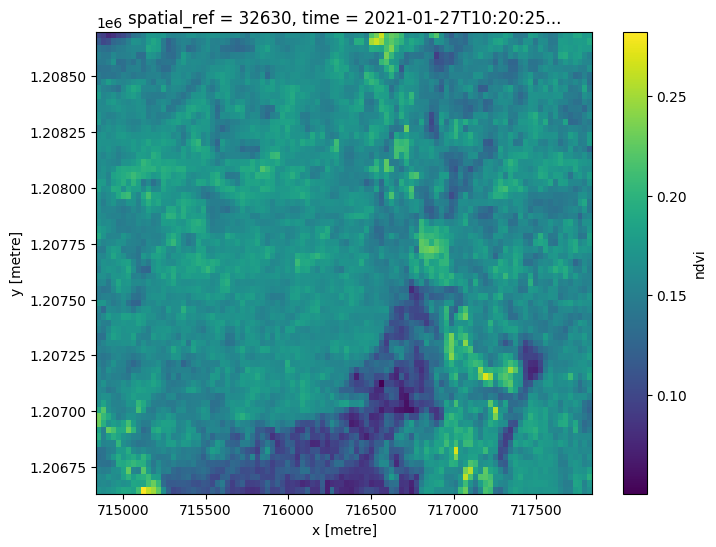

In [397]:
ds_time_stack.isel(time=3).ndvi.plot(figsize=(8,6))

In [507]:
out_dir = config['preproc_out_dir']
out_file_name = config['preproc_outfile_prefix'] + config['prep_tile_id']
sample_pct = config['preproc_sample_pct']
n_clusters = 8
cluster_tile = config['preproc_cluster_tile']

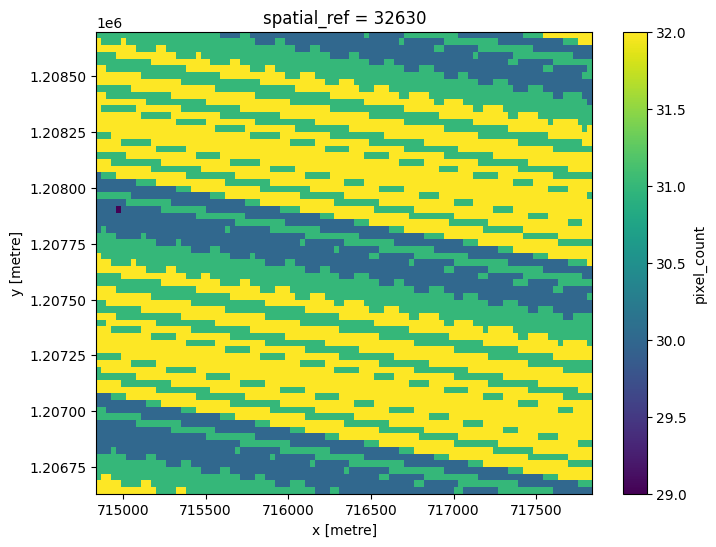

In [399]:
### Cloud-free (or not-cloud-masked) pixel count
pixel_count = ds_time_stack.ndvi.count(dim='time')
pixel_count.name = 'pixel_count'

pixel_count.plot(figsize=(8,6))


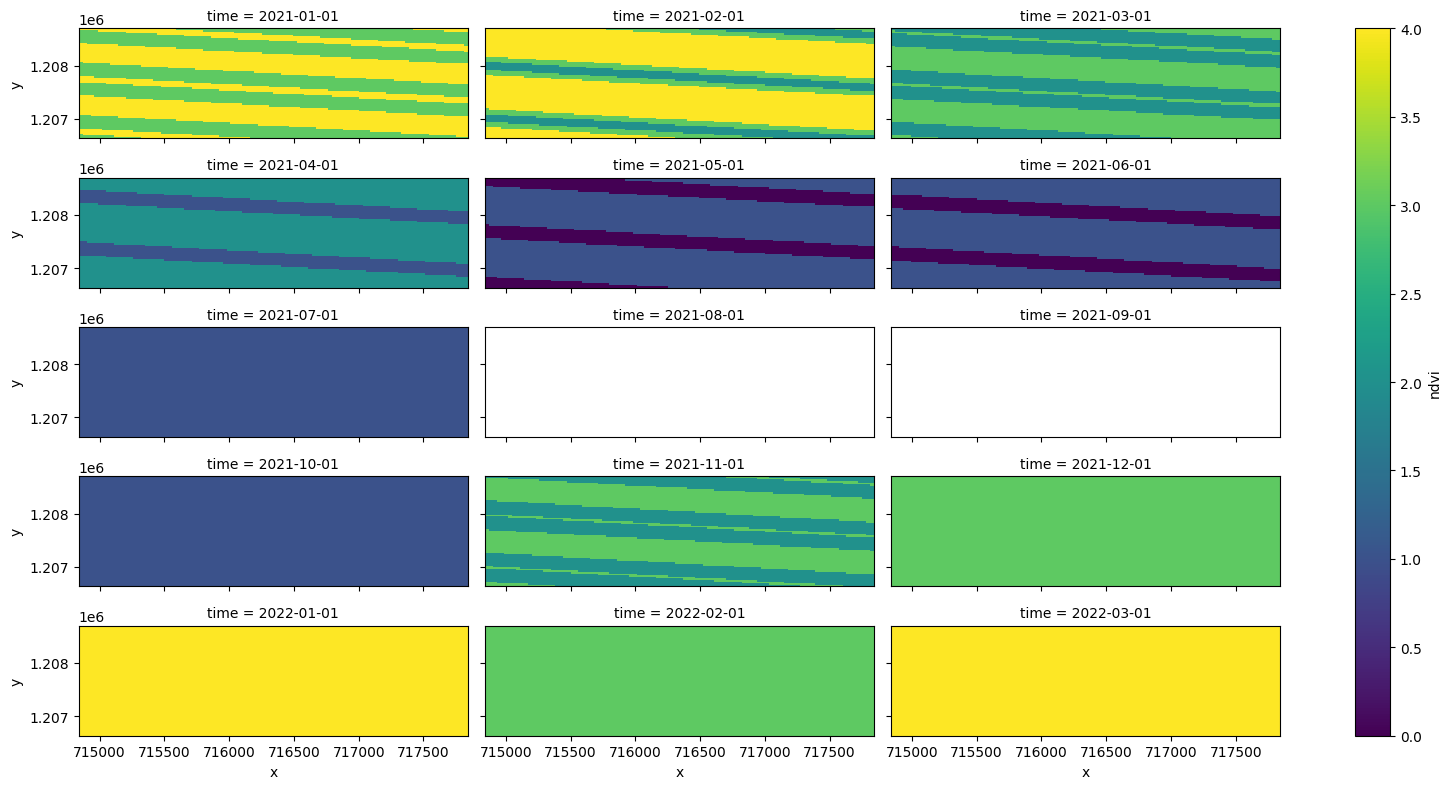

In [400]:
pixel_count_mon = ds_time_stack.ndvi.resample(time='1MS').count(dim='time')

pixel_count_mon.plot(figsize=(16,8), x='x', y='y', col='time', col_wrap=3)



In [401]:
def ndvi_xr_new(input_ds):
    '''
    computes the Normalized Difference Vegetation Index
    '''
    np.seterr(divide='ignore', invalid='ignore')
    return ((input_ds.ndvi))

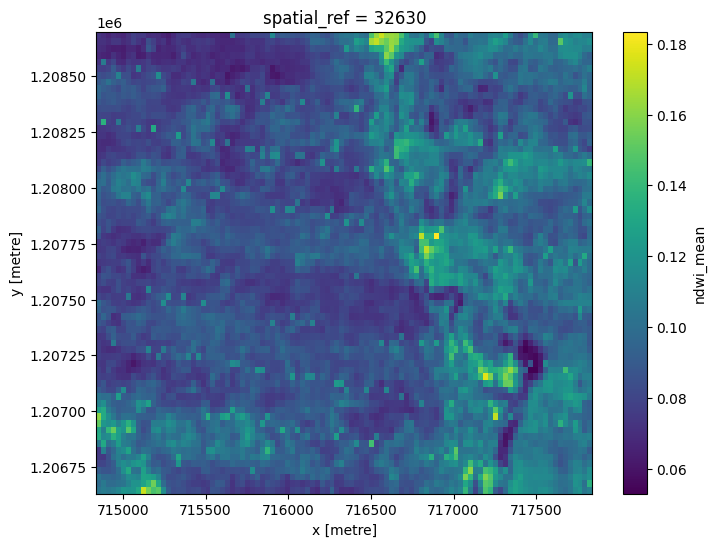

In [402]:
### NDWI stats:
### NDWI mean
ndwi_mean = ndvi_xr_new(ds_time_stack).mean(dim='time', skipna=True)
ndwi_mean.name = 'ndwi_mean'

ndwi_mean.plot(figsize=(8,6))

In [403]:


### NDVI stats:
### Standard Deviation appears to be the most resistant to noise/clouds (compared to min, max, range, mean)
ndvi_mean = ndvi_xr_new(ds_time_stack).mean(dim='time', skipna = True)
ndvi_max = ndvi_xr_new(ds_time_stack).max(dim='time', skipna = True)  # Influenced by clouds
ndvi_min = ndvi_xr_new(ds_time_stack).min(dim='time', skipna = True)  # Influenced by clouds
ndvi_range = ndvi_max - ndvi_min                                  # Influenced by clouds, might be better with monthly mean
ndvi_std = ndvi_xr_new(ds_time_stack).std(dim='time', skipna = True)    # pretty resistant to cloud noise
ndvi_var =ndvi_xr_new(ds_time_stack).var(dim='time', skipna = True)



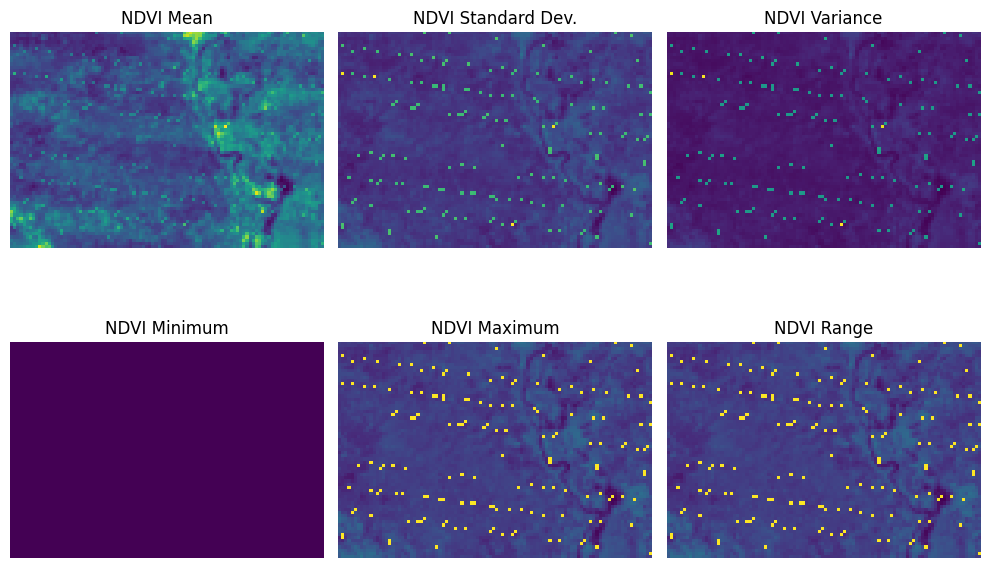

In [404]:
### Visualize the outputs
fig, ax = plt.subplots(2, 3, figsize = (10, 7), sharex=True, sharey=True)

ax[0][0].imshow(ndvi_mean)
ax[0][0].axis('off')
ax[0][0].set_title('NDVI Mean')

ax[0][1].imshow(ndvi_std)
ax[0][1].axis('off')
ax[0][1].set_title('NDVI Standard Dev.')

ax[0][2].imshow(ndvi_var)
ax[0][2].axis('off')
ax[0][2].set_title('NDVI Variance')

ax[1][0].imshow(ndvi_min)
ax[1][0].axis('off')
ax[1][0].set_title('NDVI Minimum')

ax[1][1].imshow(ndvi_max)
ax[1][1].axis('off')
ax[1][1].set_title('NDVI Maximum')

ax[1][2].imshow(ndvi_range)
ax[1][2].axis('off')
ax[1][2].set_title('NDVI Range')

fig.tight_layout()
plt.show()




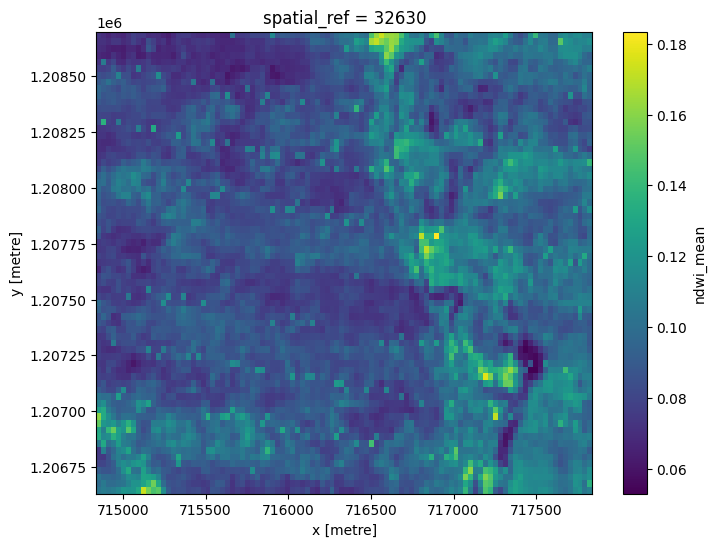

In [405]:
### NDWI stats: 
### NDWI mean
ndwi_mean = ndvi_xr_new(ds_time_stack).mean(dim='time', skipna=True)
ndwi_mean.name = 'ndwi_mean'

ndwi_mean.plot(figsize=(8,6))


In [406]:
print(ds_time_stack.time)

<xarray.DataArray 'time' (time: 34)>
array(['2021-01-03T09:38:36.462456000', '2021-01-11T10:20:29.482250000',
       '2021-01-19T09:37:28.781662000', '2021-01-27T10:20:25.413945000',
       '2021-02-04T09:36:18.860330000', '2021-02-12T10:20:22.531873000',
       '2021-02-20T09:35:06.806756000', '2021-02-28T10:20:16.587971000',
       '2021-03-08T09:33:52.477187000', '2021-03-16T10:20:07.298836000',
       '2021-03-24T09:32:35.882085000', '2021-04-01T10:20:03.522928000',
       '2021-04-09T09:31:16.954221000', '2021-05-11T09:28:35.765713000',
       '2021-06-28T09:24:35.436649000', '2021-07-06T10:20:11.355427000',
       '2021-10-26T10:20:43.134837000', '2021-11-03T09:13:19.137564000',
       '2021-11-19T09:11:46.000473000', '2021-11-27T10:20:38.514608000',
       '2021-12-05T09:10:15.348490000', '2021-12-13T10:20:38.034340000',
       '2021-12-21T09:08:43.254950000', '2022-01-06T09:07:07.092721000',
       '2022-01-14T10:20:30.571955000', '2022-01-22T09:05:36.401999000',
       '2022-0

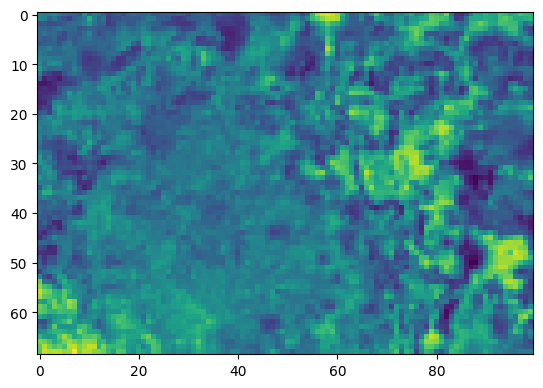

In [407]:
import matplotlib.pyplot as plot

### NDWI average for July and August
ndvi_mean_jul_aug_sep = ds_time_stack.loc[dict(time=slice('2021-07-01','2021-10-01'))].mean(dim='time')
plot.imshow(ndvi_mean_jul_aug_sep.ndvi)





In [408]:


### NDVI stats: 
### Standard Deviation appears to be the most resistant to noise/clouds (compared to min, max, range, mean)
ndvi_mean = ndvi_xr_new(ds_time_stack).mean(dim='time', skipna = True)
ndvi_max = ndvi_xr_new(ds_time_stack).max(dim='time', skipna = True)  # Influenced by clouds
ndvi_min = ndvi_xr_new(ds_time_stack).min(dim='time', skipna = True)  # Influenced by clouds
ndvi_range = ndvi_max - ndvi_min                                  # Influenced by clouds, might be better with monthly mean
ndvi_std = ndvi_xr_new(ds_time_stack).std(dim='time', skipna = True)    # pretty resistant to cloud noise
ndvi_var = ndvi_xr_new(ds_time_stack).var(dim='time', skipna = True)



In [409]:
### Normalize array values to be passed to processing functions
def normalize(array):
    '''normalized numpy array into scale 0.0 - 1.0'''
    np.seterr(divide='ignore', invalid='ignore')
    return ((array - np.nanmin(array))/(np.nanmax(array) - np.nanmin(array)))
def normalize_ufunc(array):
    return xr.apply_ufunc(normalize, array,
                          input_core_dims=[[]],
                          output_dtypes=[float],
                          dask='parallelized')


Edges Total CPU time: 0.05277900000000102
Edges Total Wall time: 0.02099195891059935


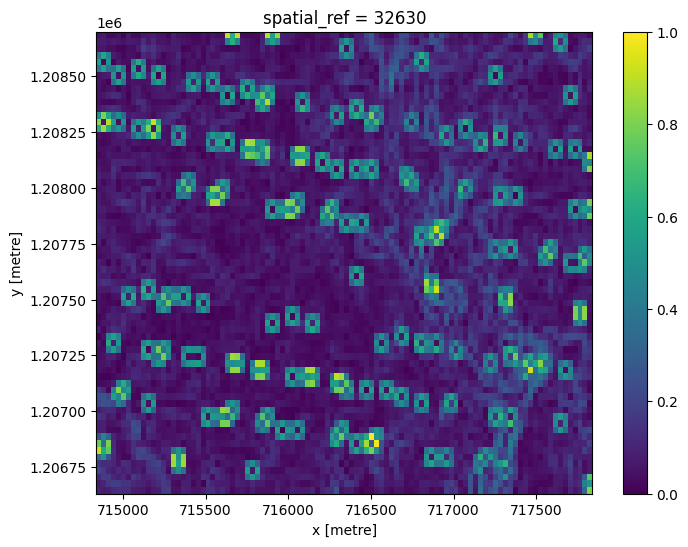

In [410]:

### Edges - Not using this edge function because it takes a lot longer and the results are noisier
### Instead of passing edges over each band in each time step, passing the standard deviation of NDVI over the time dimension
### Reduces the temporal variation between regions with varying cloud and satellite coverage
### Need to test this in non-ag regions--won't work well for edges in cities, likely--but seems to capture edges around ag fields well
#edges = compute_edges(ds_time_stack)
#edges.plot(figsize=(8,8))

## START TIMING
t_start = time.perf_counter()
t_proc_start = time.process_time()

### Edges from ndvi standard deviation
### Pass this to the longitudinal edge convolution workflow
edges_ndvi_std = xr.DataArray(normalize_ufunc(sobel(ndvi_std)),
                             dims=ndvi_std.dims,
                             coords=ndvi_std.coords).chunk({'x':'auto','y':'auto'})
   ### STOP TIMING
print("Edges Total CPU time:", time.process_time() - t_proc_start)
print("Edges Total Wall time:", time.perf_counter() - t_start)

edges_ndvi_std.plot(figsize=(8,6))



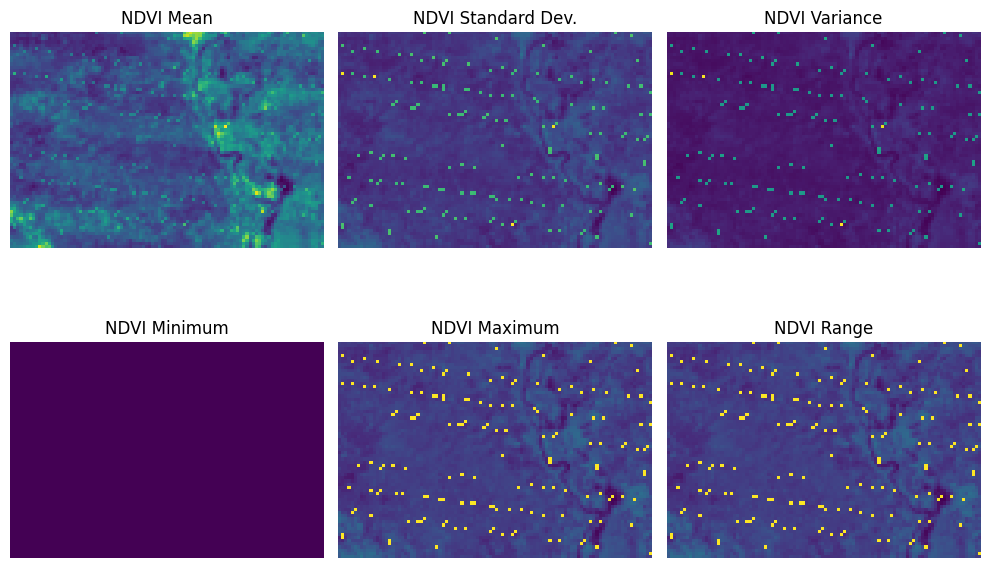

In [411]:
### Visualize the outputs
fig, ax = plt.subplots(2, 3, figsize = (10, 7), sharex=True, sharey=True)

ax[0][0].imshow(ndvi_mean)
ax[0][0].axis('off')
ax[0][0].set_title('NDVI Mean')

ax[0][1].imshow(ndvi_std)
ax[0][1].axis('off')
ax[0][1].set_title('NDVI Standard Dev.')

ax[0][2].imshow(ndvi_var)
ax[0][2].axis('off')
ax[0][2].set_title('NDVI Variance')

ax[1][0].imshow(ndvi_min)
ax[1][0].axis('off')
ax[1][0].set_title('NDVI Minimum')

ax[1][1].imshow(ndvi_max)
ax[1][1].axis('off')
ax[1][1].set_title('NDVI Maximum')

ax[1][2].imshow(ndvi_range)
ax[1][2].axis('off')
ax[1][2].set_title('NDVI Range')

fig.tight_layout()
plt.show()

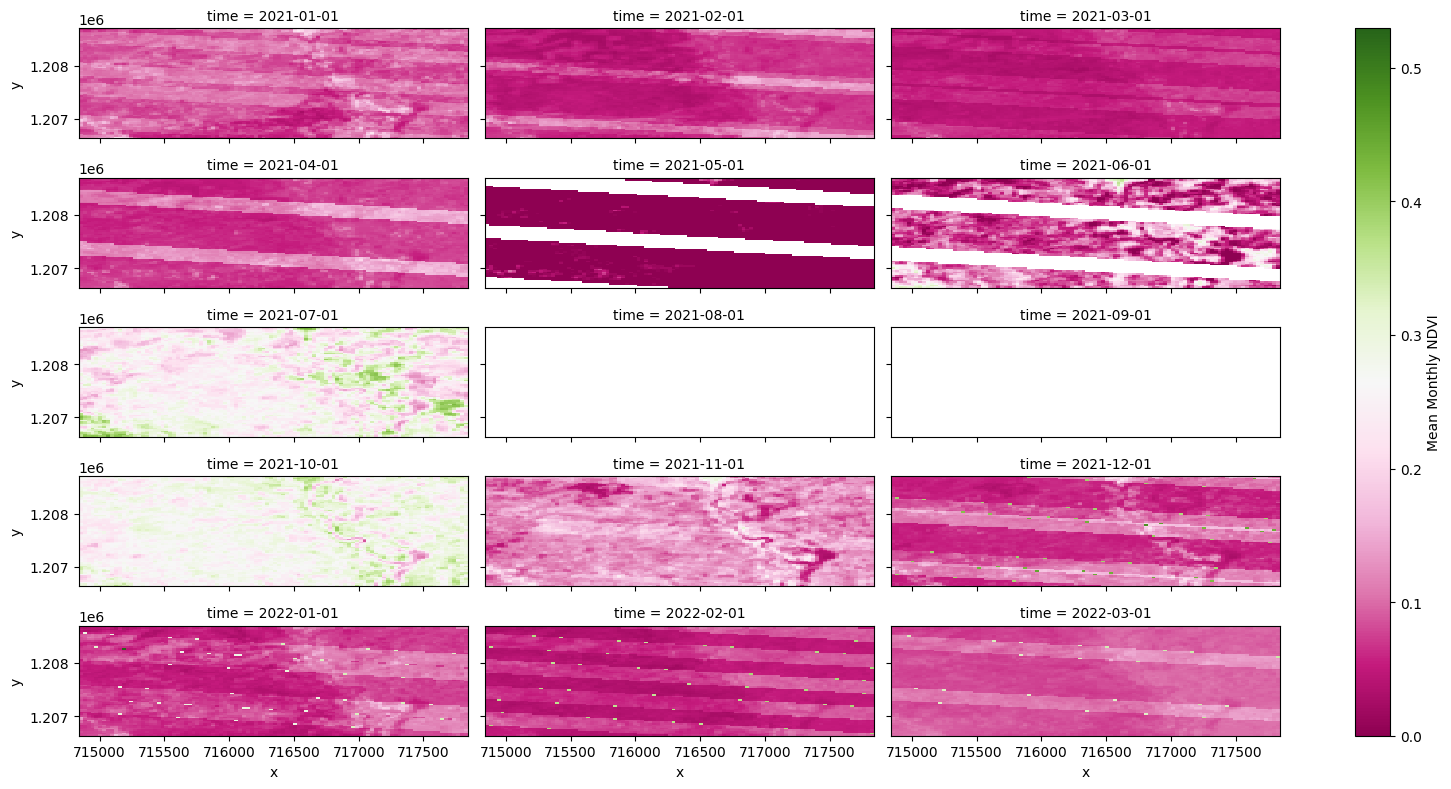

In [412]:


### Monthly mean NDVI
ndvi_mon_mean = ndvi_xr_new(ds_time_stack.resample(time='1MS').mean(dim='time', skipna = True))
ndvi_mon_mean.plot(figsize=(16,8), x='x', y='y', col='time', col_wrap=3, cmap='PiYG',
                                                          cbar_kwargs={'label': 'Mean Monthly NDVI'})



In [739]:
%%time
### START TIMING
t_start = time.perf_counter()
t_proc_start = time.process_time()

### Median - can't be computed with dask arrays, so it has to be converted to np arrays and the full stack loaded into memory and processed serially
ds_time_stack_no_dask = xr.Dataset({'ndvi':(['time', 'y', 'x'],ds_time_stack.ndvi.values)}, coords=ds_time_stack.coords)
### Compute monthly median and convert output to dask by passing chunk size method
ndvi_mon_med = ndvi_xr_new(ds_time_stack_no_dask.resample(time='1MS').median(dim='time', skipna = True, keep_attrs=True).sortby('time')).chunk({'x':'auto', 'y':'auto'})

    ### STOP TIMING
print("Monthly Median Total CPU time:", time.process_time() - t_proc_start)
print("Monthly Median Total Wall time:", time.perf_counter() - t_start)

Monthly Median Total CPU time: 0.04106899999999314
Monthly Median Total Wall time: 0.0700245420448482
CPU times: user 22.3 ms, sys: 18.9 ms, total: 41.2 ms
Wall time: 70 ms


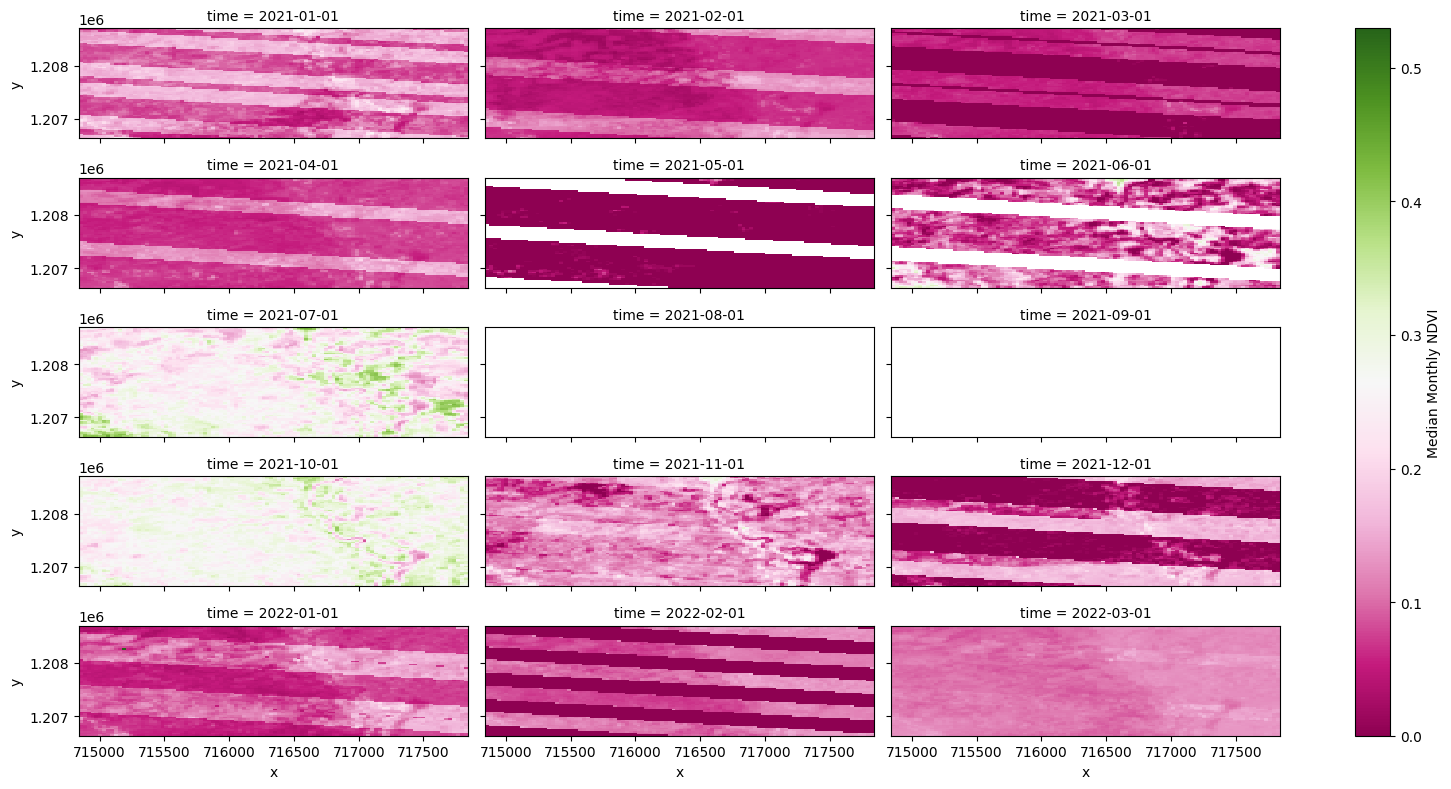

In [463]:
months = ['May','June','July','August','September','October']

g = ndvi_mon_med.plot(figsize=(16,8), x='x', y='y', col='time', col_wrap=3, cmap='PiYG',
                                                          cbar_kwargs={'label': 'Median Monthly NDVI'})

plt.draw()

Edges Total CPU time: 0.013168000000007396
Edges Total Wall time: 0.012810332933440804


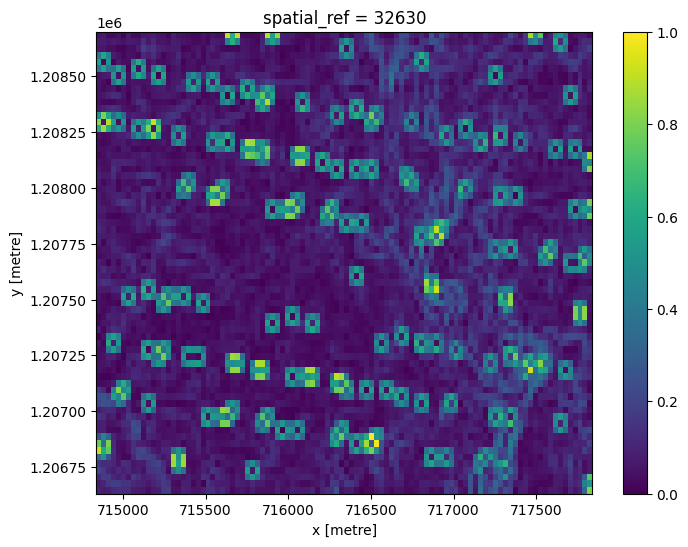

In [415]:


### Edges - Not using this edge function because it takes a lot longer and the results are noisier
### Instead of passing edges over each band in each time step, passing the standard deviation of NDVI over the time dimension
### Reduces the temporal variation between regions with varying cloud and satellite coverage
### Need to test this in non-ag regions--won't work well for edges in cities, likely--but seems to capture edges around ag fields well
#edges = compute_edges(ds_time_stack)
#edges.plot(figsize=(8,8))

## START TIMING
t_start = time.perf_counter()
t_proc_start = time.process_time()

### Edges from ndvi standard deviation
### Pass this to the longitudinal edge convolution workflow
edges_ndvi_std = xr.DataArray(normalize_ufunc(sobel(ndvi_std)),
                             dims=ndvi_std.dims,
                             coords=ndvi_std.coords).chunk({'x':'auto','y':'auto'})
   ### STOP TIMING
print("Edges Total CPU time:", time.process_time() - t_proc_start)
print("Edges Total Wall time:", time.perf_counter() - t_start)

edges_ndvi_std.plot(figsize=(8,6))



In [416]:
def compute_edges_new(ds_time_stack, edge_algo = sobel_edges, chunk_size='auto', percentile=0.1):
    for i in np.arange(0,len(ds_time_stack.coords['time']),1):
#         print('edges time step:', i)   # This is for testing
        ### Map the edge algorithm to the individual time step in the for loop
        edges = ds_time_stack.isel(time=i).fillna(0).map(edge_algo).chunk({'x':chunk_size,'y':chunk_size})
        ### Then take the sum of the edge magnitude from each band, and take the cumulative sum of all the time steps
        edges_sum = (edges['ndvi']) if i == 0 else (edges['ndvi'] + edges_sum)
    ### Then take the average edge magnitude across the full time stack
    edges_sum = edges_sum/(4*len(ds_time_stack.coords['time']))
    ### Clip outlier values based on the percentile input to remove noisy pixels with high edge values
    edges_sum = clip_nan_ufunc(edges_sum, percentile)
    ### Normalize the average edge magnitude layer to a range of 0 to 1
    edges_sum = normalize_ufunc(edges_sum)

    return edges_sum

In [417]:
%%time
### Computing average edge magnitude over the full time series.
edges = compute_edges_new(ds_time_stack)



CPU times: user 288 ms, sys: 15.7 ms, total: 304 ms
Wall time: 203 ms


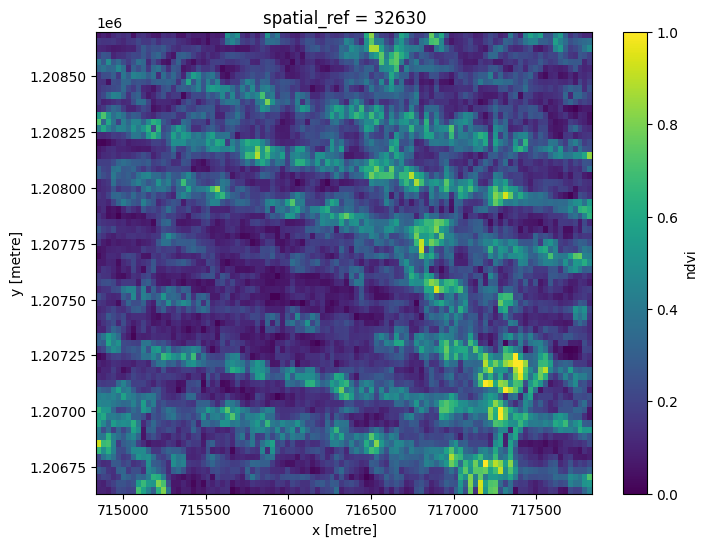

In [418]:
edges.plot(figsize=(8,6))

In [746]:


### Combine into single dataset
preproc_ds = xr.Dataset({'pixel_count':pixel_count,
                         'ndvi_std':ndvi_std,
#                             'ndvi_min':ndvi_min,
#                             'ndvi_max':ndvi_max,
                            'ndvi_mon_mean':ndvi_mon_mean})
#                         'ndvi_mon_med':ndvi_mon_med

#                             'edges_ndvi_std':edges_ndvi_std})

### Set compression in the encoding dictionary to pass to the to_netcdf() call
comp = dict(zlib=True, complevel=6)
encoding = {var: comp for var in preproc_ds.data_vars}
#    encoding['pixel_count'].update(dtype = 'int16')
#    encoding['pixel_count_mon'].update(dtype = 'int16')

        ### START TIMING
t_start = time.perf_counter()
t_proc_start = time.process_time()

test_out_fp = out_dir + out_file_name + '.nc'
print("saving preprocessed tile to:", test_out_fp)
Path(out_dir).mkdir(exist_ok=True)
preproc_ds.to_netcdf(test_out_fp, mode='w', format='NETCDF4', encoding=encoding)

    ### STOP TIMING
print("Writing NetCDF file Total CPU time:", time.process_time() - t_proc_start)
print("Writing NetCDF file Total Wall time:", time.perf_counter() - t_start)



saving preprocessed tile to: preproc_out_dir/fields_preproc_demo_TPT.nc
Writing NetCDF file Total CPU time: 0.07128399999999147
Writing NetCDF file Total Wall time: 0.16581108304671943


In [747]:
print(preproc_ds)

<xarray.Dataset>
Dimensions:        (y: 69, x: 100, time: 15)
Coordinates:
  * y              (y) float64 1.209e+06 1.209e+06 ... 1.207e+06 1.207e+06
  * x              (x) float64 7.149e+05 7.149e+05 ... 7.178e+05 7.178e+05
    spatial_ref    int32 32630
  * time           (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2022-03-01
Data variables:
    pixel_count    (y, x) int64 dask.array<chunksize=(69, 100), meta=np.ndarray>
    ndvi_std       (y, x) float32 dask.array<chunksize=(69, 100), meta=np.ndarray>
    ndvi_mon_mean  (time, y, x) float32 dask.array<chunksize=(1, 69, 100), meta=np.ndarray>


In [748]:
print(preproc_ds)

<xarray.Dataset>
Dimensions:        (y: 69, x: 100, time: 15)
Coordinates:
  * y              (y) float64 1.209e+06 1.209e+06 ... 1.207e+06 1.207e+06
  * x              (x) float64 7.149e+05 7.149e+05 ... 7.178e+05 7.178e+05
    spatial_ref    int32 32630
  * time           (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2022-03-01
Data variables:
    pixel_count    (y, x) int64 dask.array<chunksize=(69, 100), meta=np.ndarray>
    ndvi_std       (y, x) float32 dask.array<chunksize=(69, 100), meta=np.ndarray>
    ndvi_mon_mean  (time, y, x) float32 dask.array<chunksize=(1, 69, 100), meta=np.ndarray>


In [749]:
preproc_ds = preproc_ds.sel(time=slice('2021-04-01', '2021-11-30'))
print(preproc_ds)



<xarray.Dataset>
Dimensions:        (y: 69, x: 100, time: 8)
Coordinates:
  * y              (y) float64 1.209e+06 1.209e+06 ... 1.207e+06 1.207e+06
  * x              (x) float64 7.149e+05 7.149e+05 ... 7.178e+05 7.178e+05
    spatial_ref    int32 32630
  * time           (time) datetime64[ns] 2021-04-01 2021-05-01 ... 2021-11-01
Data variables:
    pixel_count    (y, x) int64 dask.array<chunksize=(69, 100), meta=np.ndarray>
    ndvi_std       (y, x) float32 dask.array<chunksize=(69, 100), meta=np.ndarray>
    ndvi_mon_mean  (time, y, x) float32 dask.array<chunksize=(1, 69, 100), meta=np.ndarray>


In [750]:

print('number of clusters for statewide model:', n_clusters)

number of clusters for statewide model: 8


In [751]:
%%time

if cluster_tile:
    out_dir_cluster_centers = out_dir + 'cluster_centers/' 
    Path(out_dir_cluster_centers).mkdir(exist_ok=True)

    ### KMeans clustering
    ### NOTE: before clustering, make sure each variable is normalized - NDVI is already normalized
#        kmeans_input_array = ndvi_mon_med.stack(stack=('x','y'))
#        kmeans_input_array = kmeans_input_array.transpose('stack','time').fillna(0).chunk(chunks={'stack':'auto','time':'auto'})

    ### NEW CODE - Adding NDVI std and NWDI mean Jul-Sep to cluster
    ndvi_mon_med_stack = ndvi_mon_mean.stack(stack=('x','y'))
    ndvi_mon_med_stack = ndvi_mon_med_stack.transpose('stack','time').fillna(0).rename({'time':'variable'})
    ndvi_mon_med_stack = ndvi_mon_med_stack.chunk(chunks={'stack':'auto','variable':'auto'})
    #ndvi_mon_med_stack = ndvi_mon_med_stack.transpose('stack','time').fillna(0)
    print('ndvi_mon_med_stack', ndvi_mon_med_stack)

    to_cluster_ds = xr.Dataset(data_vars={'ndvi_std':normalize_ufunc(preproc_ds.ndvi_std), 
#                                          'edges':normalize_ufunc(preproc_ds.edges_ndvi_std), 
                                          'ndwi_mean':normalize_ufunc(preproc_ds.ndvi_std)})
    to_cluster_ds = to_cluster_ds.to_array(name='nontime_vars').stack(stack=('x','y')).transpose('stack','variable').fillna(0)

    #### Combining ndvi time series with other cluster vars
    image_array = xr.concat([ndvi_mon_med_stack,to_cluster_ds], dim='variable')
    image_array = image_array.chunk(chunks={'stack':'auto', 'variable':'auto'})
    print('image array to cluster:',image_array)

    ### set width and height
    w, h = len(ds_time_stack.coords['x']), len(ds_time_stack.coords['y'])
    sample_pct = sample_pct
    n_samples = int(w * h * sample_pct)
    n_clusters = n_clusters
    print('kmeans total samples:', n_samples)

    t0 = time.time()
    image_array_sample = shuffle(image_array, random_state=0)[:n_samples]
    image_array_sample = image_array_sample.chunk(chunks={'stack':'auto','variable':'auto'})
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)
    print("kmeans clustering done in %0.3fs." % (time.time() - t0))

    ### FIX ME: if there are not any images for a month to create a monthly median NDVI layer, the cluster vars will not be the right length
    ### build DA of kmeans clusters of monthly median NDVI time series
    cluster_centers_da = xr.DataArray(kmeans.cluster_centers_,
                                      dims=['n','cluster_vars'],
                                      coords={'n':range(n_clusters)})

    t_start = time.perf_counter()
    t_proc_start = time.process_time()

    test_out_fp = out_dir_cluster_centers + out_file_name + '_kmeans_cluster_centers.nc'
    cluster_centers_da.to_netcdf(test_out_fp, mode='w', format='NETCDF4')

    ### STOP TIMING
    print("Writing Cluster Centers NetCDF file Total CPU time:", time.process_time() - t_proc_start)
    print("Writing Cluster Centers NetCDF file Total Wall time:", time.perf_counter() - t_start)



ndvi_mon_med_stack <xarray.DataArray 'ndvi' (stack: 6900, variable: 15)>
dask.array<rechunk-merge, shape=(6900, 15), dtype=float32, chunksize=(6900, 15), chunktype=numpy.ndarray>
Coordinates:
  * variable     (variable) datetime64[ns] 2021-01-01 2021-02-01 ... 2022-03-01
    spatial_ref  int32 ...
  * stack        (stack) object MultiIndex
  * x            (stack) float64 7.149e+05 7.149e+05 ... 7.178e+05 7.178e+05
  * y            (stack) float64 1.209e+06 1.209e+06 ... 1.207e+06 1.207e+06
image array to cluster: <xarray.DataArray 'ndvi' (stack: 6900, variable: 17)>
dask.array<rechunk-merge, shape=(6900, 17), dtype=float64, chunksize=(6900, 17), chunktype=numpy.ndarray>
Coordinates:
  * variable     (variable) object 2021-01-01 2021-02-01 ... 'ndwi_mean'
    spatial_ref  int32 32630
  * stack        (stack) object MultiIndex
  * x            (stack) float64 7.149e+05 7.149e+05 ... 7.178e+05 7.178e+05
  * y            (stack) float64 1.209e+06 1.209e+06 ... 1.207e+06 1.207e+06
kmeans t

/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [752]:
# Fit model to cluster centers - SELECT K for statewide
# fit a kmeans model on a sample of the data
t0 = time.time()
kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=0).fit(cluster_merge.clusters)
print("KMeans training on statewide samples done in %0.3fs." % (time.time() - t0))

agg_clusters_da = xr.DataArray(kmeans.cluster_centers_,
                              dims=['cluster_ID', 'cluster_vars'])
agg_clusters_da = agg_clusters_da.assign_coords({'cluster_vars':cluster_merge.cluster_vars})
print('Cluster Centers:', agg_clusters_da)
print(agg_clusters_da.cluster_vars.values)

### Save KMeans model
Path(kmeans_model_out_dir).mkdir(exist_ok=True)
#kmeans_file_name = 'statewide_kmeans_' + str(n_clusters) + 'clusters.sav'
kmeans_fp = kmeans_model_out_dir + kmeans_file_name
pickle.dump(kmeans, open(kmeans_fp, 'wb'))

### Save statewide cluster centers for reference
agg_clusters_da_out_fp = kmeans_model_out_dir + kmeans_file_name[:-4] + '_cluster_centers.nc'
agg_clusters_da.to_netcdf(agg_clusters_da_out_fp, mode='w', format='NETCDF4')


KMeans training on statewide samples done in 0.038s.
Cluster Centers: <xarray.DataArray (cluster_ID: 8, cluster_vars: 17)>
array([[1.24377319e-01, 1.07010855e-01, 1.06371025e-02, 9.80790023e-02,
        2.13062223e-03, 1.12183319e-01, 3.14628454e-01, 0.00000000e+00,
        0.00000000e+00, 2.99934712e-01, 1.53524941e-01, 1.57279887e-01,
        1.17459193e-01, 6.21756482e-02, 1.24280295e-01, 2.19666901e-01,
        6.05124239e-01],
       [1.18206591e-01, 7.01308117e-02, 4.59633984e-02, 8.26082418e-02,
        4.33680869e-19, 4.29359553e-02, 1.94323833e-01, 0.00000000e+00,
        0.00000000e+00, 2.57370857e-01, 1.14924272e-01, 6.31391304e-02,
        8.70881876e-02, 6.64926293e-02, 1.12673998e-01, 1.39002371e-01,
        2.49379223e-01],
       [1.57353789e-01, 6.48801327e-02, 7.37213716e-02, 7.63667300e-02,
        0.00000000e+00, 2.72727281e-01, 3.99575174e-01, 0.00000000e+00,
        0.00000000e+00, 3.11898023e-01, 1.47826090e-01, 0.00000000e+00,
        1.51959211e-01, 1.48246720e

/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<xarray.DataArray 'cluster_vars' (cluster_vars: 17)>
array(['ndvi_jan2021', 'ndvi_feb2021', 'ndvi_march2021', 'ndvi_may2021',
       'ndvi_jun2021', 'ndvi_jul2021', 'ndvi_aug2021', 'ndvi_sep2021',
       'ndvi_oct2021', 'ndvi_nov2021', 'ndvi_dec2021', 'ndvi_jan2022',
       'ndvi_feb2022', 'ndvi_mar2022', 'ndvi_mean', 'ndvi_std', 'ndwi_mean'],
      dtype=object)
Coordinates:
  * cluster_vars  (cluster_vars) object 'ndvi_jan2021' ... 'ndwi_mean'


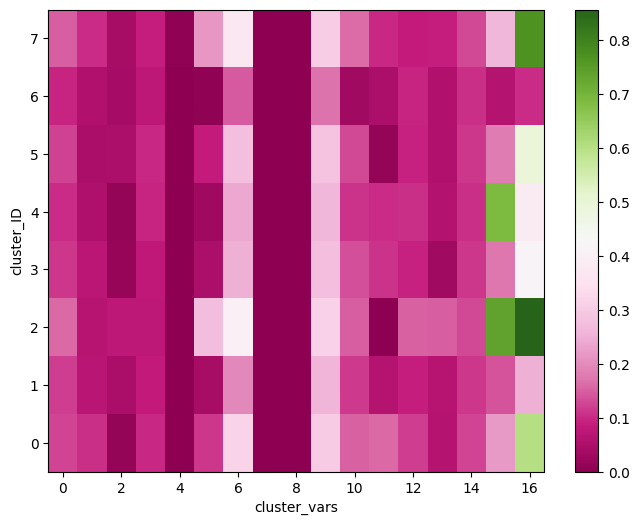

In [753]:


print(agg_clusters_da.cluster_vars)
agg_clusters_da.assign_coords({'cluster_vars':range(0,len(agg_clusters_da.cluster_vars))}).plot(figsize=(8,6), cmap='PiYG')



In [783]:
preproc_fp = config['preproc_out_dir'] + config['preproc_outfile_prefix'] + config['prep_tile_id'] + '.nc'
print(preproc_fp)

preproc_ds = xr.open_dataset(preproc_fp)
print(preproc_ds)





preproc_out_dir/fields_preproc_demo_TPT.nc
<xarray.Dataset>
Dimensions:        (y: 69, x: 100, time: 15)
Coordinates:
  * y              (y) float64 1.209e+06 1.209e+06 ... 1.207e+06 1.207e+06
  * x              (x) float64 7.149e+05 7.149e+05 ... 7.178e+05 7.178e+05
    spatial_ref    int32 ...
  * time           (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2022-03-01
Data variables:
    pixel_count    (y, x) int64 ...
    ndvi_std       (y, x) float32 ...
    ndvi_mon_mean  (time, y, x) float32 ...


In [795]:
def fit_kmeans_x_y_time_array_to_clustered_img_new(input_array, trained_kmeans):
    
    # This creates an array of shape 6 feature vectors length 250000
    image_array = input_array.stack(stack=('x','y'))
    # transpose to get a 2D array with x*y by time features, fill NaN values with 0 otherwise kmeans will fail
    image_array = image_array.transpose('stack','time').fillna(0)

    # extract the numpy array from the xarray dataset
    np_array = image_array.values
    
    
    # Train k-means model
    kmeans = KMeans(n_clusters=10, n_init=50, max_iter=500, random_state=42)
    kmeans.fit(preproc_ds)

# Cluster data and plot results
    

    # fit input array to model to get labels for all points
    t0 = time.time()
    labels = kmeans.predict(np_array)
    print("fitting data to kmeans model done in %0.3fs." % (time.time() - t0))
    
    # Reassemble clustered array to original image dimensions
    clustered_img = create_classified_image(labels, w, h)
    
    clustered_img_da = xr.DataArray(clustered_img,
                                      dims=['y','x'],
                                      coords={'x':input_array.coords['x'],
                                              'y':input_array.coords['y']})
    clustered_img_da = clustered_img_da.chunk({'x': 'auto', 'y': 'auto'}).astype(int)
    
    return clustered_img_da

    
    
    

In [796]:
clustered_img = fit_kmeans_x_y_time_array_to_clustered_img_new(preproc_ds, kmeans)
clustered_img.plot(figsize=(12,10), cmap='tab20_r')

TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_array()` method.

In [ ]:
%%time

 ### This results in an unexpected NameError on the tile_id name but the outputs are as expected and I couldn't find the bug
 write_statewide_kmeans_model()

 t_start = time.time()
 create_mask_from_kmeans()
 print("mask processing done in %0.3fs." % (time.time() - t_start))

In [ ]:
class KMeansClusterer:
   
    non_crop_cluster_labels = []
    crop_cluster_labels = [] 
    def create_mask_from_kmeans():
        #     global config
        
        # Load preprocessed imagery data into single dataset 
        preproc_tile_dir = config['preproc_out_dir']
        tile_id = config['prep_tile_id']
        preproc_fp_str = preproc_tile_dir + '*' + tile_id + '*.nc'
        preproc_merge_ds = xr.open_mfdataset(preproc_fp_str, chunks={'x':'auto', 'y':'auto'}, combine='by_coords')

        ### Apply kmeans
        # Load kmeans model
        kmeans_model_out_dir = config['kmeans_model_out_dir']
        n_clusters = config['kmeans_n_clusters']
        kmeans_file_name = 'statewide_kmeans_' + str(n_clusters) + 'clusters.sav'
        kmeans_fp = kmeans_model_out_dir + kmeans_file_name
        kmeans = pickle.load(open(kmeans_fp, 'rb'))

        # define crop and non-crop clusters
        std_thresh = config['kmeans_std_thresh']
        min_thresh = config['kmeans_min_thresh']
        max_thresh = config['kmeans_max_thresh']
        range_thresh = config['kmeans_range_thresh']
        kmeans_8var_clusters = config['kmeans_8var_clusters']

        print('Cluster Centers just NDVI Mon Med:', kmeans.cluster_centers_.T[:-2].T)

        
        print('label | ', 'standard deviation | ', 'minimum | ', 'maximum | ', 'range')

        if kmeans_8var_clusters:
            for idx, cluster_center in enumerate(kmeans.cluster_centers_.T[:-2].T):
                print(idx,
                    np.std(cluster_center), 
                    np.min(cluster_center), 
                    np.max(cluster_center), 
                    (np.max(cluster_center)-np.min(cluster_center)))
                if np.std(cluster_center) < std_thresh or np.min(cluster_center) > min_thresh or np.max(cluster_center) < max_thresh or (np.max(cluster_center)-np.min(cluster_center)) < range_thresh:
                    KMeansClusterer.non_crop_cluster_labels.append(idx)
                else:
                    KMeansClusterer.crop_cluster_labels.append(idx)

        if not kmeans_8var_clusters:
            for idx, cluster_center in enumerate(kmeans.cluster_centers_):
                print(idx, 
                    np.std(cluster_center), 
                    np.min(cluster_center), 
                    np.max(cluster_center), 
                    (np.max(cluster_center)-np.min(cluster_center)))
                if np.std(cluster_center) < std_thresh or np.min(cluster_center) > min_thresh or np.max(cluster_center) < max_thresh or (np.max(cluster_center)-np.min(cluster_center)) < range_thresh:
                    KMeansClusterer.non_crop_cluster_labels.append(idx)
                else:
                    KMeansClusterer.crop_cluster_labels.append(idx)

        print('non-crop cluster labels:', KMeansClusterer.non_crop_cluster_labels)
        print('crop cluster labels:', KMeansClusterer.crop_cluster_labels)
    


This should be eyeballed!!!!!


In [ ]:

KMeansClusterer.create_mask_from_kmeans()

In [ ]:


# apply kmeans to imagery tile data
clustered_img_output = fit_kmeans_preproc_array_to_clustered_img_8_vars(preproc_ds, kmeans)

### Bin clusters into crop/non-crop binary mask
cluster_mask = clustered_img_output.isin(KMeansClusterer.non_crop_cluster_labels)



In [ ]:
#Empty Right now makes sense to do this after the mask is created
cluster_subset = clustered_img_output.where(clustered_img_output.isin(KMeansClusterer.crop_cluster_labels))
cluster_subset.plot(cmap='tab20_r', figsize=(10,10))

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 8), sharex=True, sharey=True)

cmap = plt.cm.tab20  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
# cmaplist[0] = (.5, .5, .5, 1.0)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 15, 16)
# print(bounds)
# bounds = (bounds+1)[:-1]
# print(bounds)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

im = ax1.imshow(clustered_img_output.values, cmap=cmap, norm=norm)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="2%", pad=0.05)
ax1.axis('off')
ax1.set_title('Clustered Image')
# cbar = plt.colorbar(im, cax=cax)
cb = plt.colorbar(im, cax, cmap=cmap, norm=norm,
    spacing='proportional', ticks=bounds+1, boundaries=bounds, format='%1i')
cb.set_label('Cluster ID')


im2 = ax2.imshow(cluster_subset.values, cmap=cmap, norm=norm)
ax2.axis('off')
ax2.set_title('Crop Clusters')

# fig.suptitle("Sample Image: Aug 6, 2019", fontsize=16)
fig.tight_layout()
fig_name = 'Clustered_Img_with_Crop_Clusters.png'
plt.savefig(out_dir + fig_name, bbox_inches = "tight")
plt.show()

In [ ]:


date_index = 15

rgb_da = clip_nan_ufunc(xr.concat([geotiffs_ds.NDVI.isel(time=date_index),
                                   geotiffs_ds.WDRVI.isel(time=date_index),
                                   geotiffs_ds.SAVI.isel(time=date_index)], dim='band'), percentile=1)
rgb_da = rgb_da.assign_coords(band=['NDVI','WDRVI', 'SAVI'])
rgb_da = rgb_da.chunk(chunks='auto')

### Transpose to (y, x, band) 
rgb_da = rgb_da.transpose('y', 'x', 'band')


plt.imshow(exposure.equalize_adapthist(rgb_da.values,clip_limit=0.01))



In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 5), sharex=True, sharey=True)

cmap = plt.cm.tab20  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 15, 16)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

im = ax1.imshow(clustered_img_output.values, cmap=cmap, norm=norm)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="2%", pad=0.05)
ax1.axis('off')
ax1.set_title('Clustered Image')
# cbar = plt.colorbar(im, cax=cax)
cb = plt.colorbar(im, cax, cmap=cmap, norm=norm,
    spacing='proportional', ticks=bounds+1, boundaries=bounds, format='%1i')
cb.set_label('Cluster ID')


im2 = ax2.imshow(cluster_subset.values, cmap=cmap, norm=norm)
ax2.axis('off')
ax2.set_title('Crop Clusters')

ax3.imshow(exposure.equalize_adapthist(rgb_da.values,clip_limit=0.01))
ax3.axis('off')
ax3.set_title('Composite')

# fig.suptitle("Sample Image: Aug 6, 2019", fontsize=16)
fig.tight_layout()
plt.show()

In [ ]:
print(preproc_ds)

In [ ]:


### NDWI mask
ndwi_thresh = config['kmeans_ndwi_thresh']
ndwi_mask = preproc_ds.ndvi_std.where(preproc_ds.ndvi_std > ndwi_thresh, 0)
ndwi_mask = ndwi_mask.where(ndwi_mask <= ndwi_thresh, 1)

ndwi_mask.plot(figsize=(10,8))  ### plotting intermediate mask



In [ ]:

def segment_data(ds_time_stack, mask):
    #     print("-------Segmentation-------")
        
    ### Prep RGB
    rgb_date_str = config['seg_rgb_date_str']
    gaussian_filt = config['seg_rgb_gaussian_filt'] # True
    gaussian_sigma = config['seg_rgb_gaussian_sigma'] # 2
    percentile = config['seg_rgb_percentile'] # 2
    # chunking
    base_chunk = config['prep_base_chunk']
    chunk_size = {'band': "auto", 'x': base_chunk, 'y': base_chunk}
    # segmentation parameters
    seg_scale = config['seg_fz_scale']
    seg_sigma = config['seg_fz_sigma']
    seg_min_size = config['seg_fz_min_size']

    use_nir = config['seg_use_nir']

    ### If the config specifies not to use the NIR in segmentation, it will create an RGB composite
    ### from the imagery date in the RGB_Date dictionary
    if not use_nir:
        rgb_date = datetime.datetime.strptime(rgb_date_str, '%Y%m%d')
        ### Build RGB xr DataArray to be passed to segmentation and merge functions
        ### Percentile is the amount of the rgb image to clip from either end of the histogram
        # Combine bands into RGB array and rescale the intensity so that image has better contrast for segmentation
        rgb_da = clip_nan_ufunc(xr.concat([ds_time_stack.NDVI.sel(time=rgb_date, method='nearest'),
                                        ds_time_stack.NDWI.sel(time=rgb_date, method='nearest'),
                                        ds_time_stack.SAVI.sel(time=rgb_date, method='nearest')], dim='band'), percentile=percentile)

    ### If using the multi-temporal NIR composite for segmentation:
    if use_nir:
        nir_date_list = prep_nir_dates_for_rgb_image()
        nir_date_1 = nir_date_list[0]
        nir_date_2 = nir_date_list[1]
        nir_date_3 = nir_date_list[2]
        ### Build RGB xr DataArray to be passed to segmentation and merge functions
        ### Percentile is the amount of the rgb image to clip from either end of the histogram
        # Combine bands into RGB array and rescale the intensity so that image has better contrast for segmentation
        rgb_da = clip_nan_ufunc(xr.concat([ds_time_stack.nir.sel(time=nir_date_1, method='nearest'),
                                        ds_time_stack.nir.sel(time=nir_date_2, method='nearest'),
                                        ds_time_stack.nir.sel(time=nir_date_3, method='nearest')], dim='band'), percentile=percentile)

    rgb_da = rgb_da.assign_coords(band=['r','g','b'])
    rgb_da = rgb_da.chunk(chunks=chunk_size)

    ### Transpose to (y, x, band) in order to pass to 
    rgb_da = rgb_da.transpose('y', 'x', 'band')

    ### Apply gaussian filter to rgb image
    if gaussian_filt == True:
        dims = rgb_da.dims
        coords = rgb_da.coords
        rgb_da = xr.DataArray(rgb_da.data.map_overlap(gaussian, sigma = gaussian_sigma, multichannel = True, depth = 1),
                                    dims=dims,
                                    coords=coords)

    ### Apply mask to rgb image
    rgb_da = rgb_da.where(mask==1, other=0).fillna(0)
    rgb_da = rgb_da.mask
    rgb_da.name = 'masked_rgb'



In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
plt.imshow(rgb_da)

In [ ]:
%%time
seg_scale =200
seg_sigma = .5
seg_min_size = 10
### FIX ME : figure out how to run segmentation in parallel??? I think the skimage module only takes np arrays
segments = segmentation.felzenszwalb(ndwi_mask.values, scale=seg_scale, sigma=seg_sigma, min_size=seg_min_size)

print(segments)

In [ ]:
from skimage.segmentation import mark_boundaries

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 7), sharex=True, sharey=True)

ax1.imshow(rgb_da)
ax1.axis('off')
ax1.set_title('Masked NIR Temporal Composite')

ax2.imshow(mark_boundaries(rgb_da, segments))
ax2.axis('off')
ax2.set_title('Field Segments')

# fig.suptitle("Sample Image: Aug 6, 2019", fontsize=16)
fig.tight_layout()
plt.show()

In [ ]:
print(segments)
segments = segments.astype(np.int32)


In [ ]:
def write_shapefile_new(segmented_array, ds_time_stack, mask_input):
    '''
    This function takes an array (meant for a raster that has already been segmented)
    and writes the polygonized raster to a shapefile.
    input_array: raster to by polygonized and exported
    src_transform: the "transform" spatial metadata from the rasterio.read() of the source raster
    src_crs: the coordinate reference system from the source raster, as a string. ex: 'EPSG:32614'
    output_file: file path/name ending with '.shp' for the output
    '''
    print("-------Writing to Shapefile-------")
    tile_id = config['prep_tile_id']
    out_dir = config['shp_out_dir']
    file_out_str = config['shp_file_out_str']
    manual_subset = config['prep_manual_subset']
    x_start = config['prep_x_start']
    y_start = config['prep_y_start']
    
        ### Save to shapefile
    # set file paths for output
    out_file_name = tile_id + file_out_str + ".shp"
    output_str = out_dir + out_file_name

    # set parameters for spatial projection and mask    
    transform = ds_time_stack.attrs['transform']
    ### The transform will be incorrect if the raster has been subset from the top or left at all
    if manual_subset:
        transform_update = (ds_time_stack.attrs['transform'][0],
                            ds_time_stack.attrs['transform'][1],
                            ds_time_stack.coords['x'].values[0]-5,
                            ds_time_stack.attrs['transform'][3],
                            ds_time_stack.attrs['transform'][4],
                            ds_time_stack.coords['y'].values[0]+5)
        transform  = transform_update
        # Update outfile name to reflect spatial subset
        out_file_name = tile_id + file_out_str + "_x" + str(x_start) + "_y" + str(y_start) + "_step" + str(config['prep_step']) + ".shp"
        output_str = out_dir + out_file_name
    
    # CRS from main data stack attributes
    crs = ds_time_stack.attrs['crs']
    # Define mask and set type to bool as required for shapefile writing to work
    ### QUESTION : Data Type, should this data type be changed in the mask processing or does it not really make a difference? 
    if type(mask_input) == xr.core.dataset.Dataset:
        mask_input = mask_input.mask
    
    shp_mask = mask_input.fillna(value=0).astype(bool)
    
    # polygonize input raster to GeoJSON-like dictionary with rasterio.features.shapes
    # update segmented_array data type based on error message: "image dtype must be one of: int16, int32, uint8, uint16, float32"   
    results = ({'geometry': s, 'properties': {'raster_val': v}}
          for i, (s, v) in enumerate(features.shapes(segmented_array.astype('int16'), mask=shp_mask.values, transform = transform)))
    geoms = list(results)
    
    # establish schema to write into shapefile
    schema_template = {
    'geometry':'Polygon', 
    'properties': {
        'raster_val':'int'}}
    
    Path(out_dir).mkdir(exist_ok=True)
    
    # src_crs is the coordinate reference system from the source raster that holds the spatial metadata
    with fiona.open(output_str, 'w', driver='Shapefile', schema = schema_template, crs = crs) as layer:
        # loop through the list of raster polygons and write to the shapefile
        for geom in geoms:
            layer.write(geom)
    
    print("Output saved to:", output_str)


In [ ]:


t0 = time.time()
### Write segments to shapefile
write_shapefile_new(segments, geotiffs_ds, cluster_mask)
print("Shapefile write done in %0.3fs." % (time.time() - t0))

